In [2]:

## Name: Jianlei(John) Sun


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [ ]:
# Questions: Given 25,000 profiles and payment history of current customers, 
# predict whether 5,000 new customers are credible or not.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
plt.style.use('ggplot') 

# Data Exploration

In [5]:
# read in the datasets 
train_data = pd.read_csv('./data_HW4/train.csv')
test_data = pd.read_csv('./data_HW4/test.csv')

sampleSubmission = pd.read_csv('./data_HW4/sampleSubmission.csv')
submmission = pd.read_csv('./data_HW4/Submmission.csv')
testGroundTruth = pd.read_csv('./data_HW4/testGroundTruth.csv',header = None)

In [6]:
# display the top five records
train_data.head(5)

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [7]:
# check missing values? => Observation: no missing values
np.sum(train_data.isnull())

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [8]:
# distinguish among continuous and categorical variables
cat_cols = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
con_cols = [i for i in train_data.columns if i not in cat_cols and i != 'id' and i !='Y']

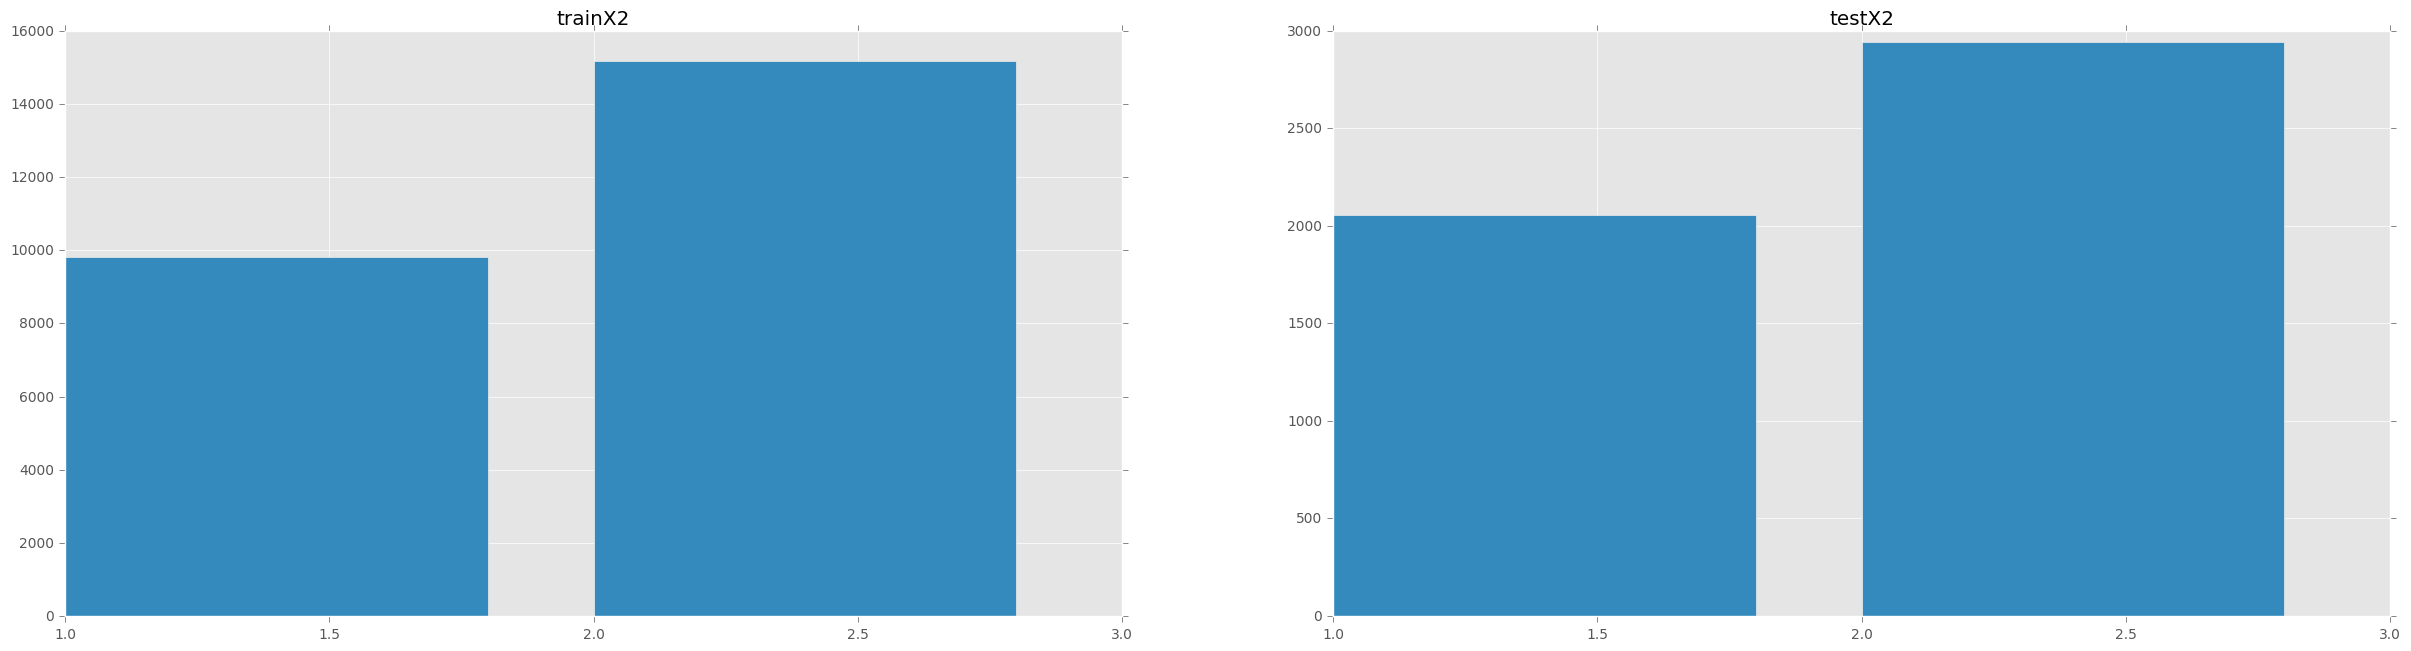

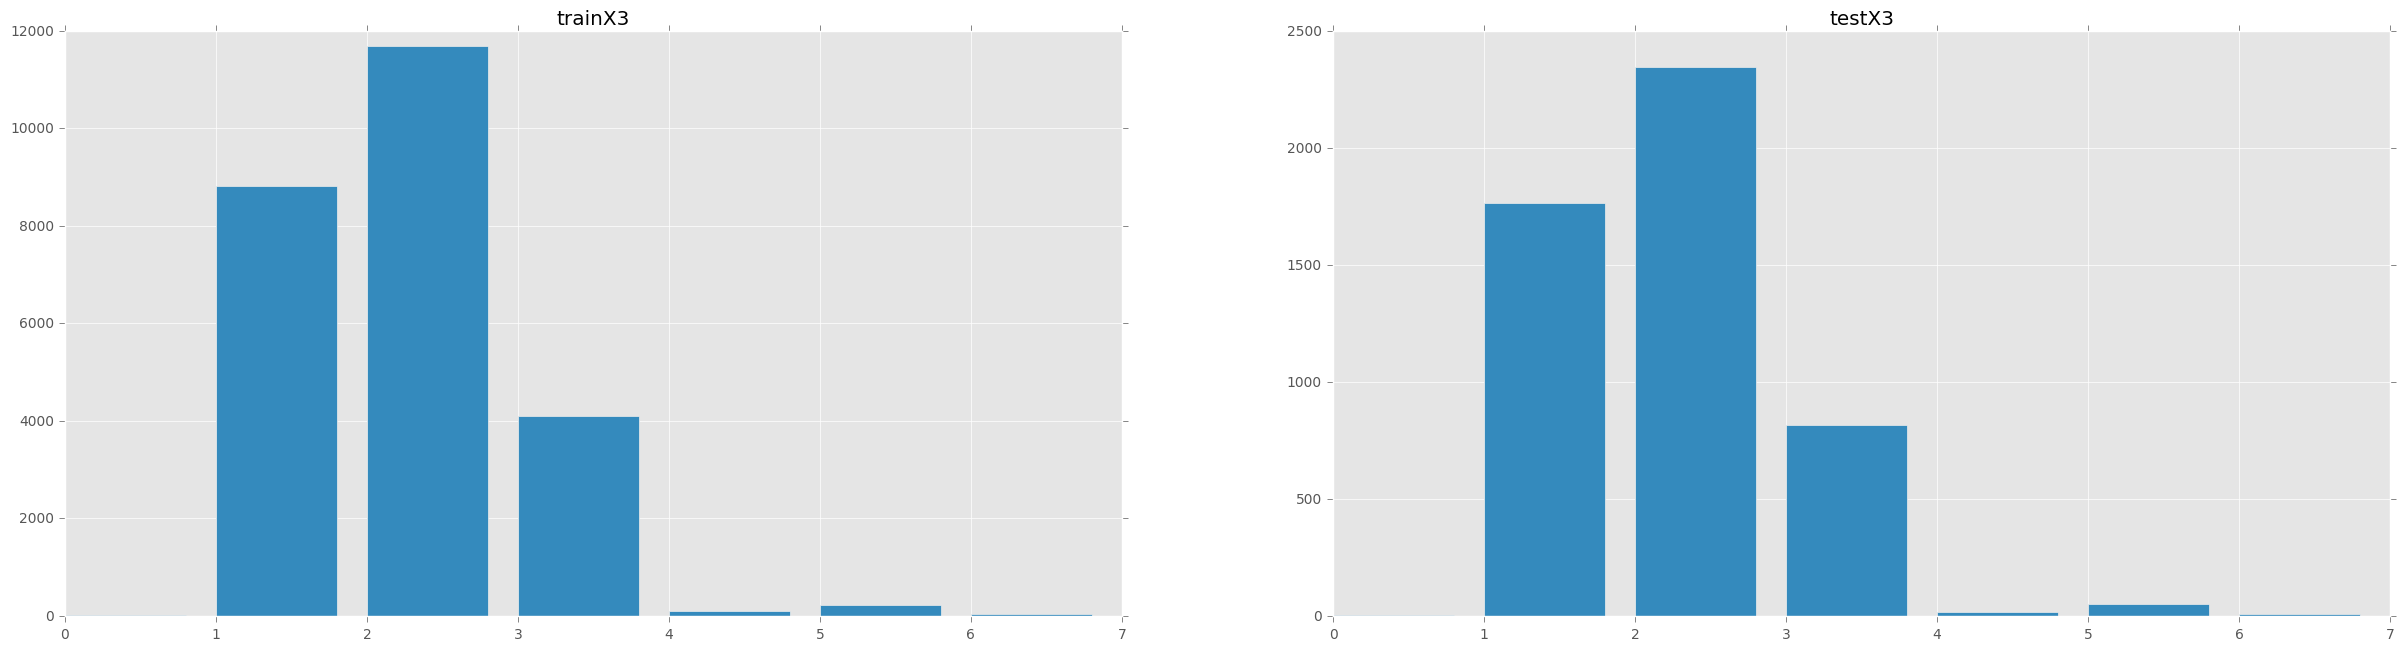

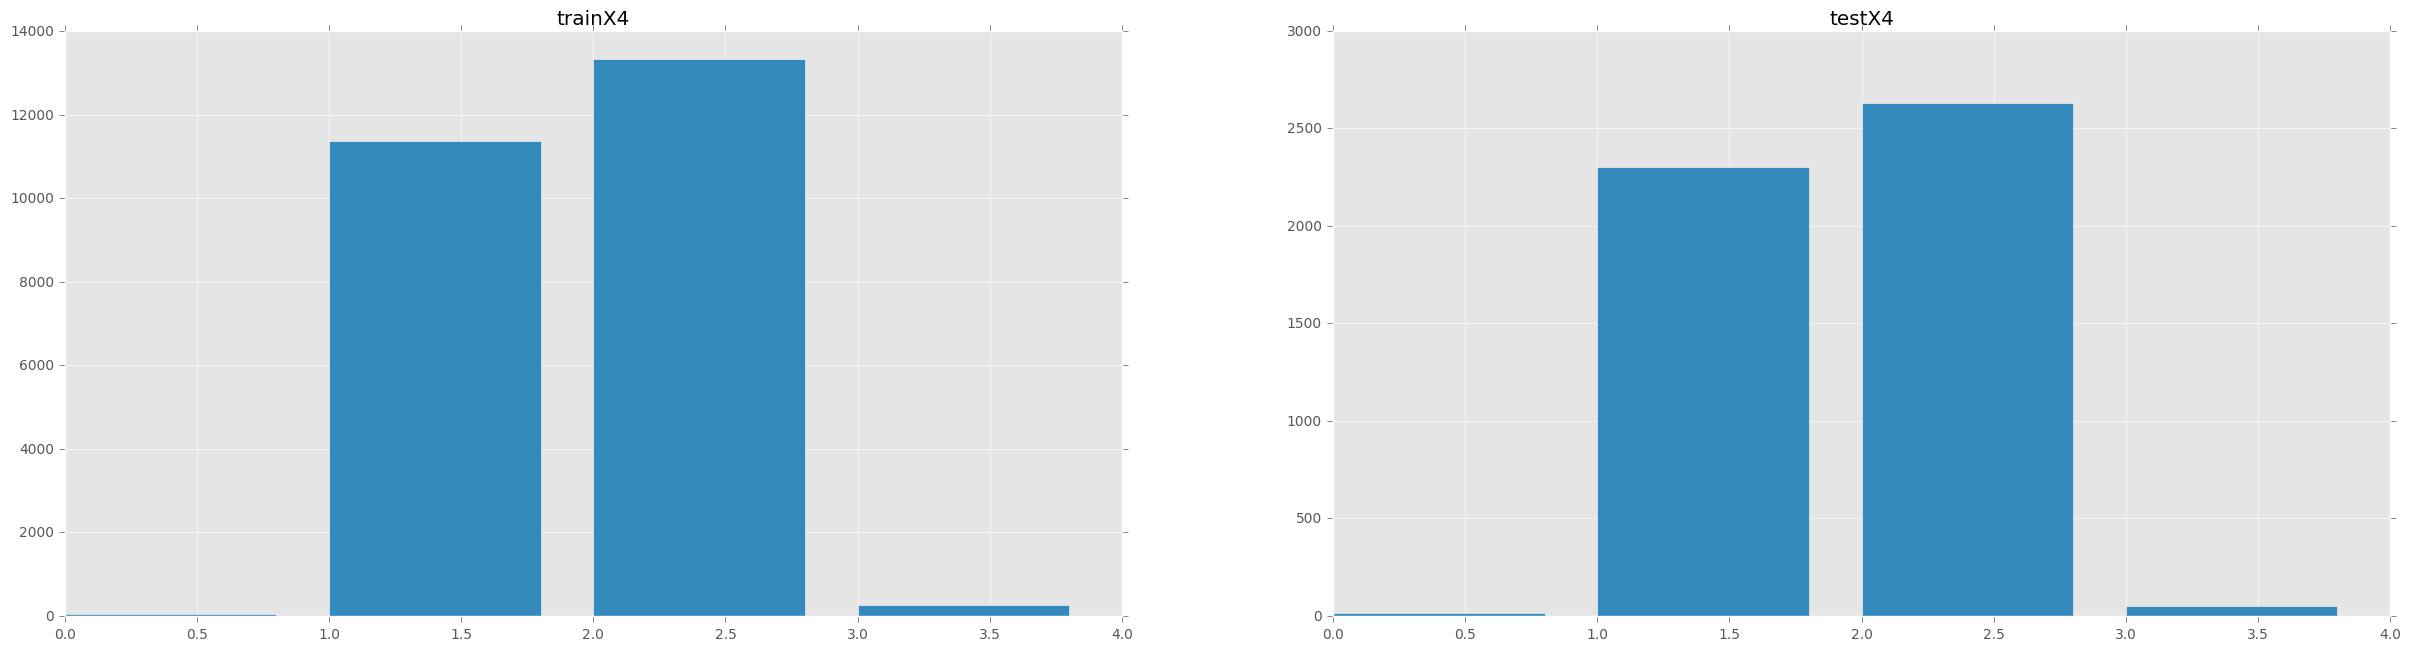

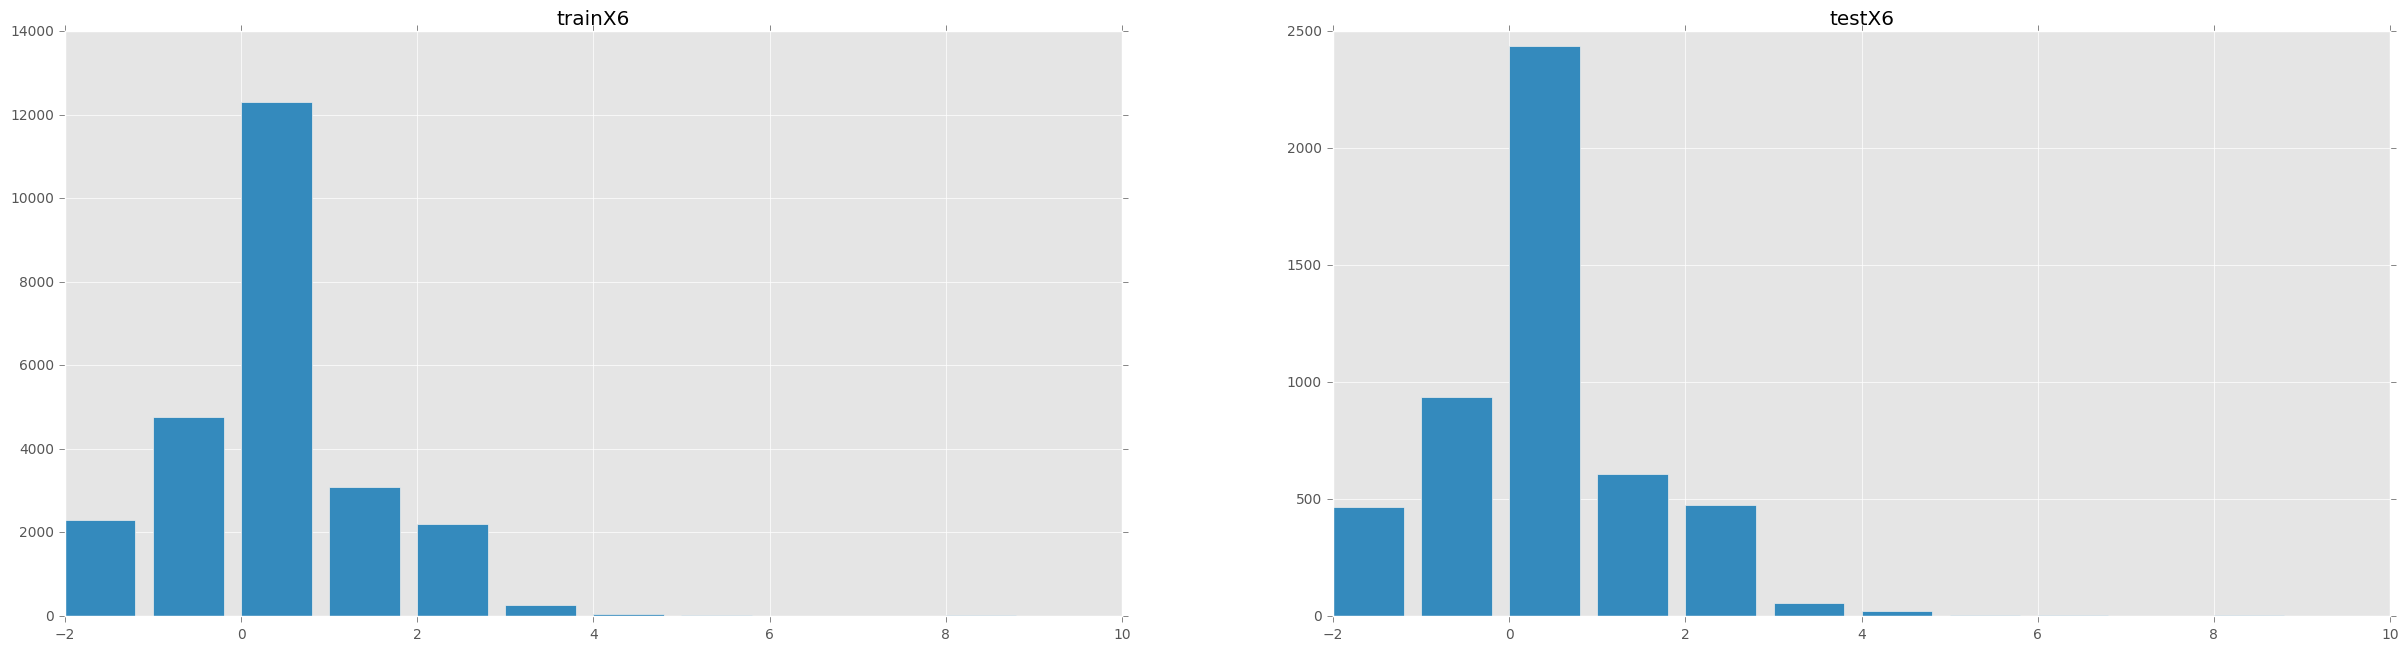

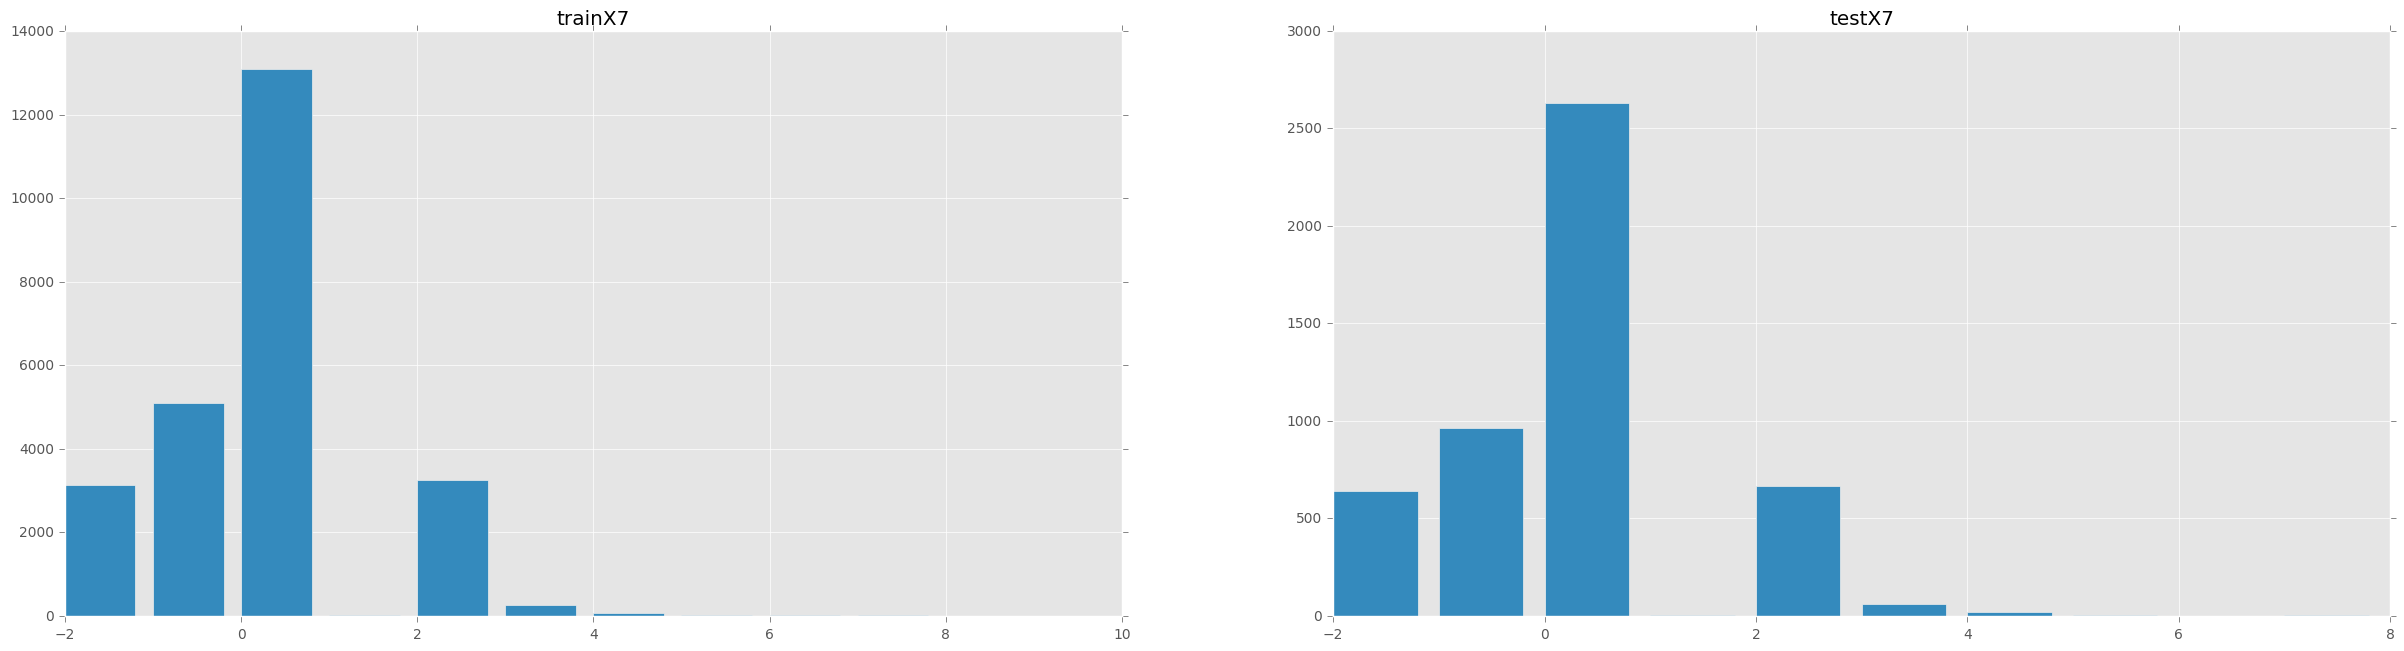

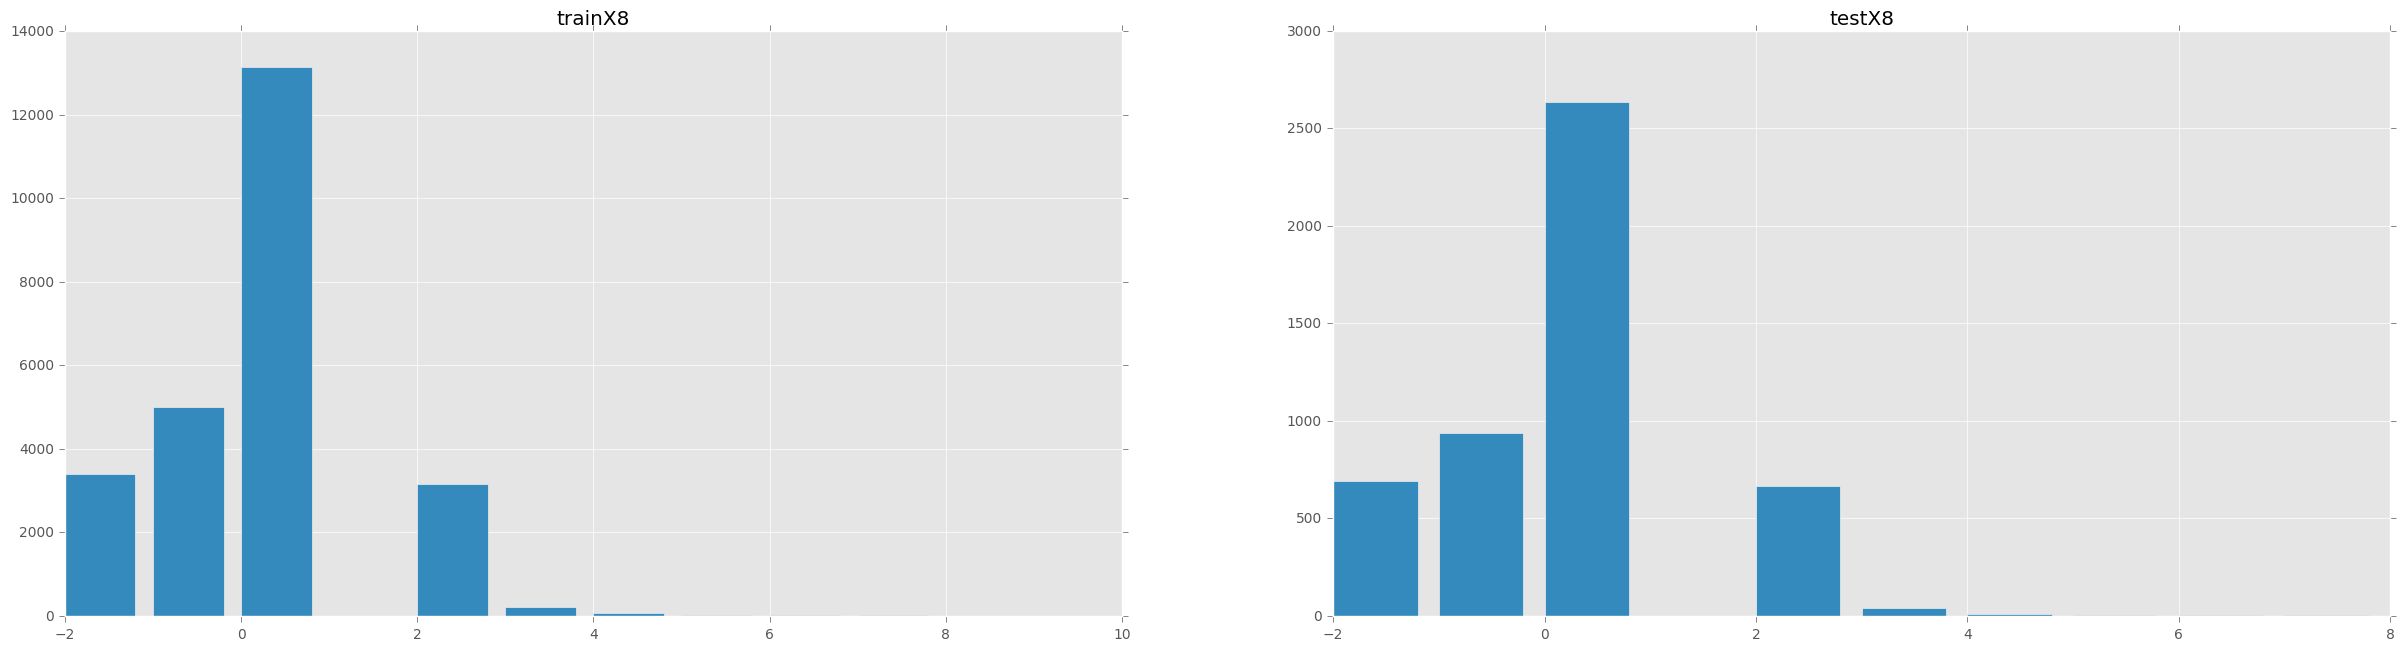

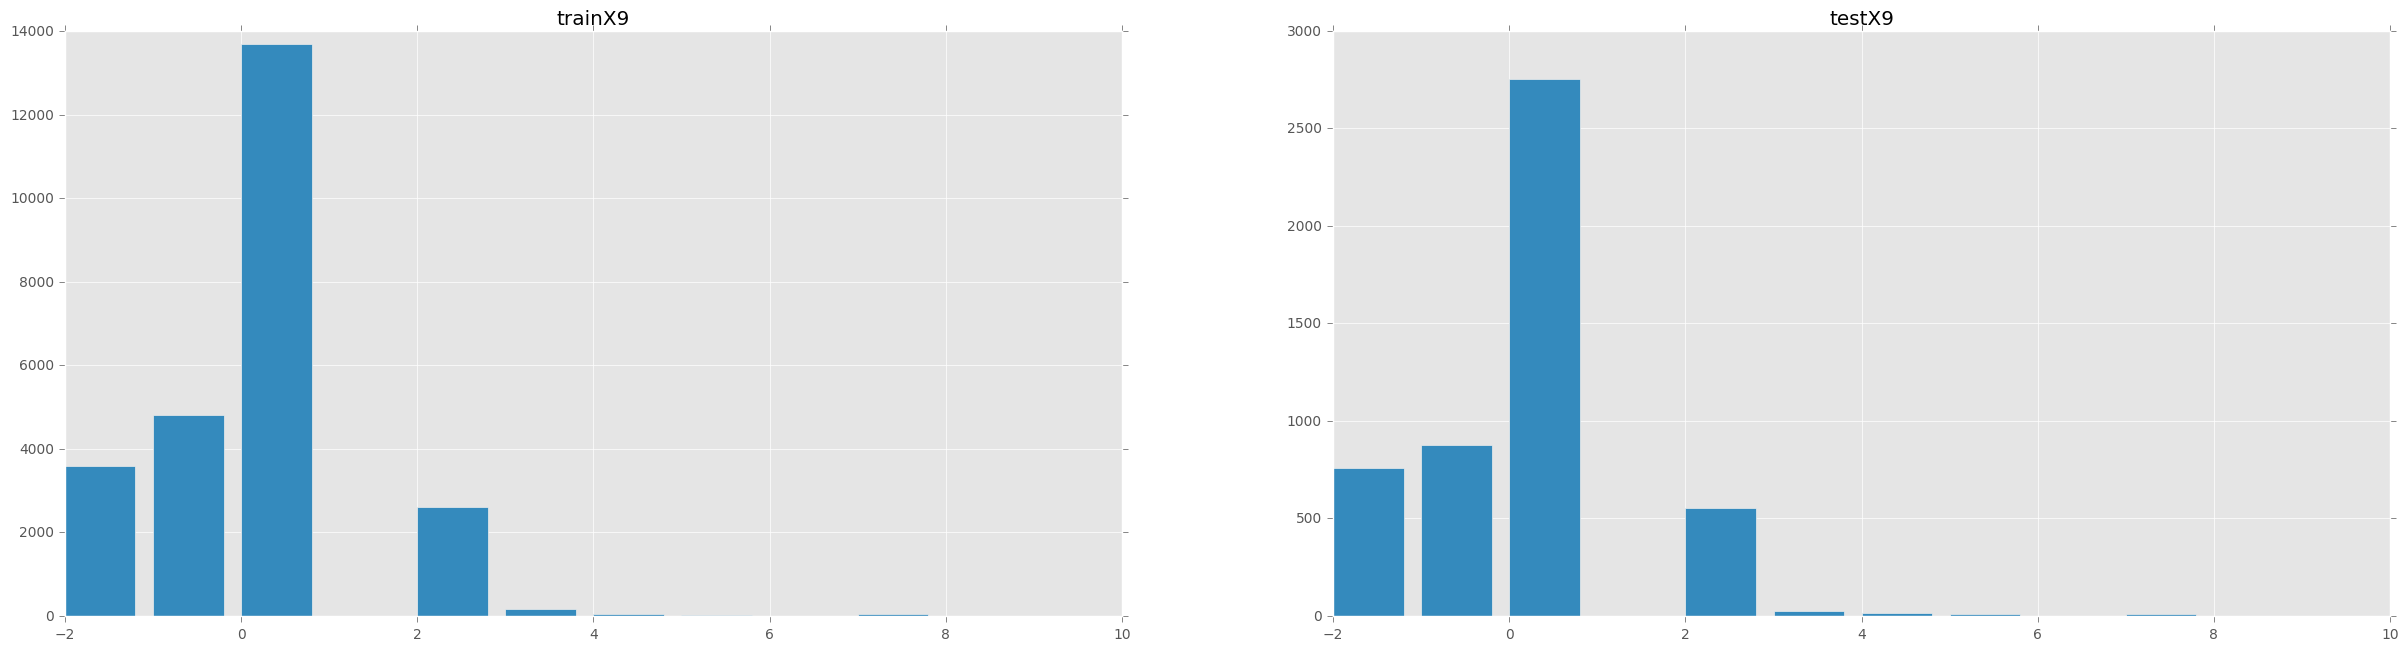

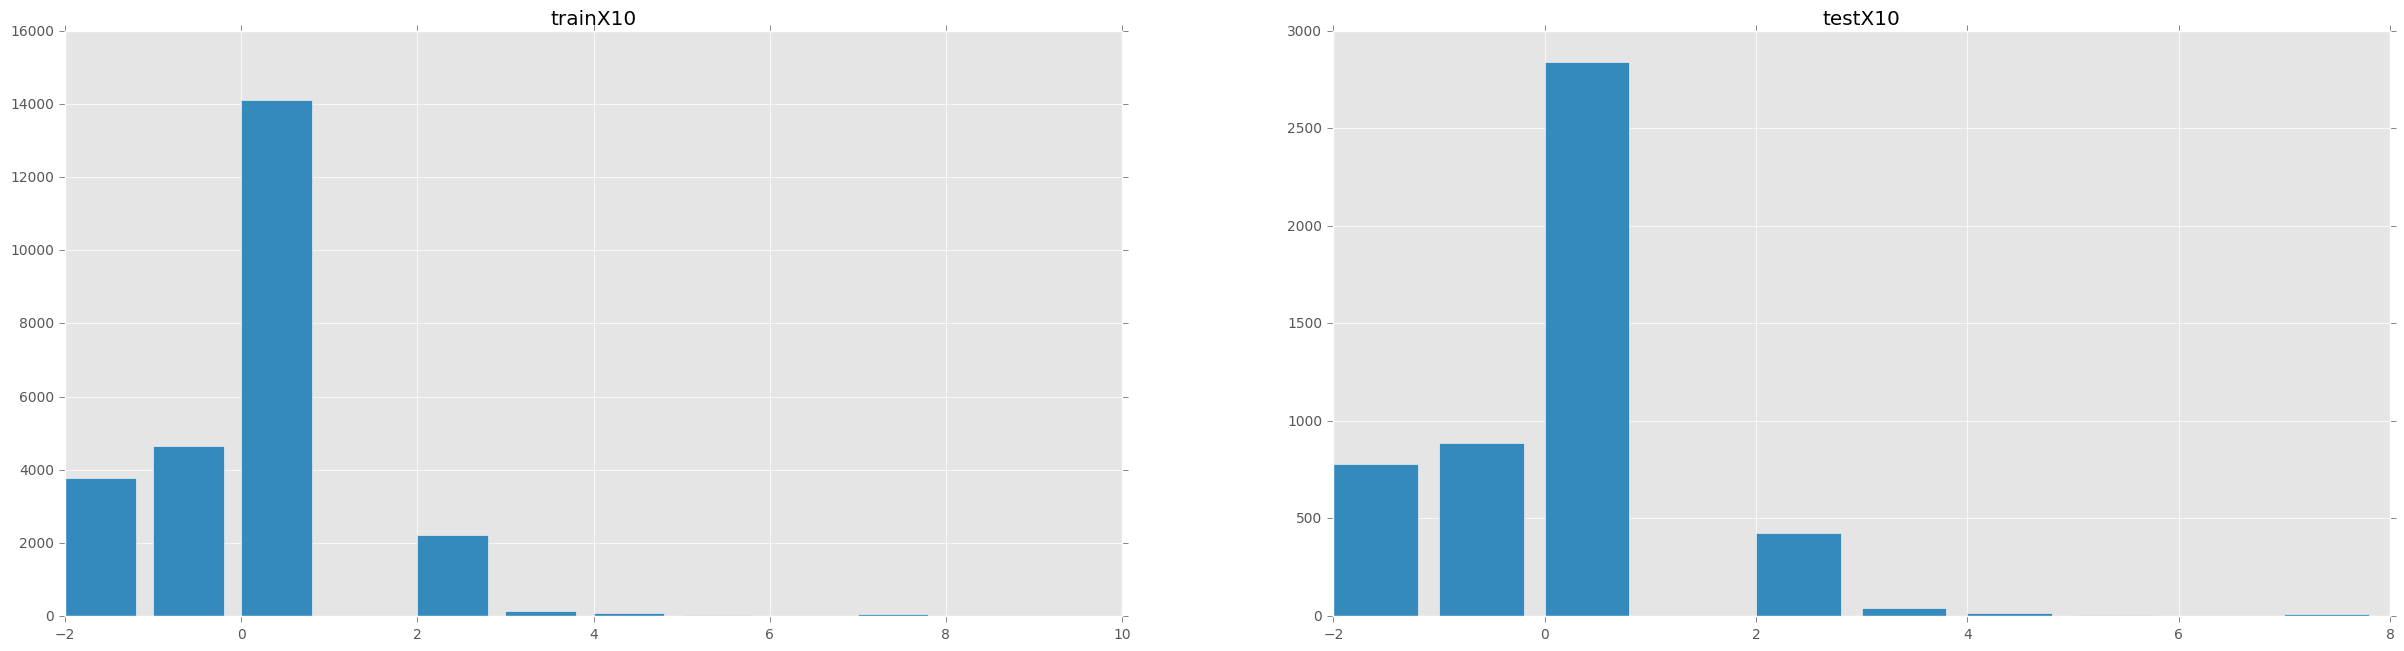

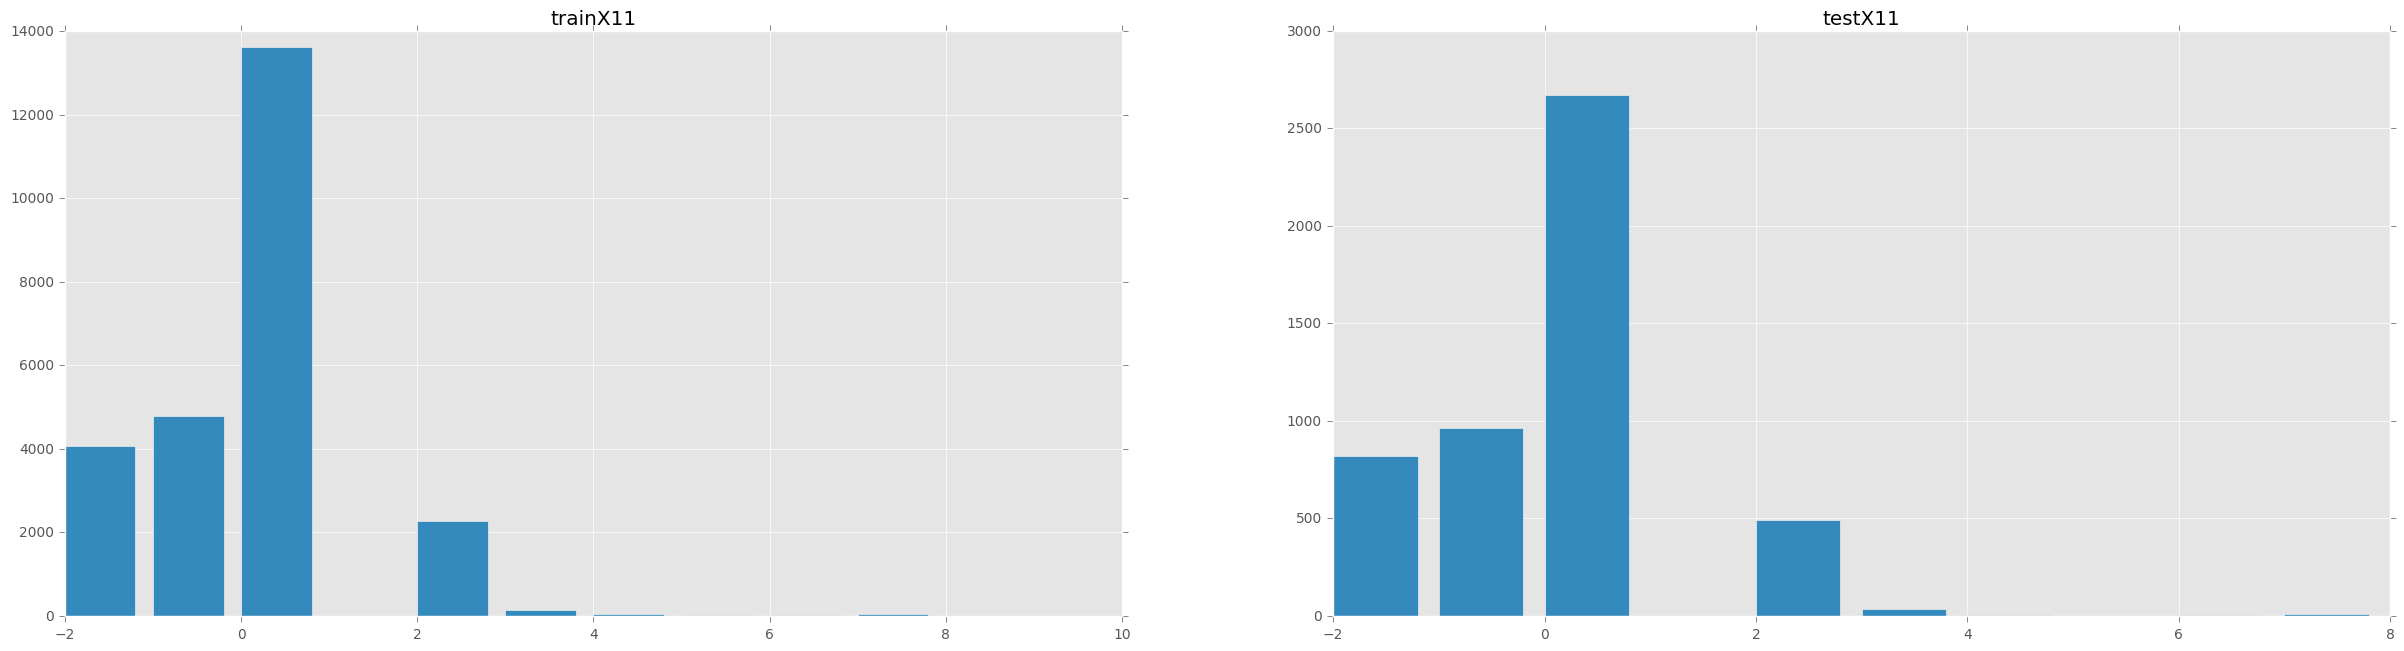

In [9]:
# Compare histograms of categorical variables between "trainig_data" and "test_data"
count=1
for i in range(len(cat_cols)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_cols),2,count)
    plt.bar(train_data[cat_cols[i]].value_counts().index, train_data[cat_cols[i]].value_counts().values)
    plt.title("train"+cat_cols[i])
    
    plt.subplot(len(cat_cols),2,count+1)
    plt.bar(test_data[cat_cols[i]].value_counts().index, test_data[cat_cols[i]].value_counts().values)
    plt.title("test"+cat_cols[i])
    count+=2

In [10]:
# Observation: "train_data" shows similar distributions as the "test_data".

<Container object of 2 artists>

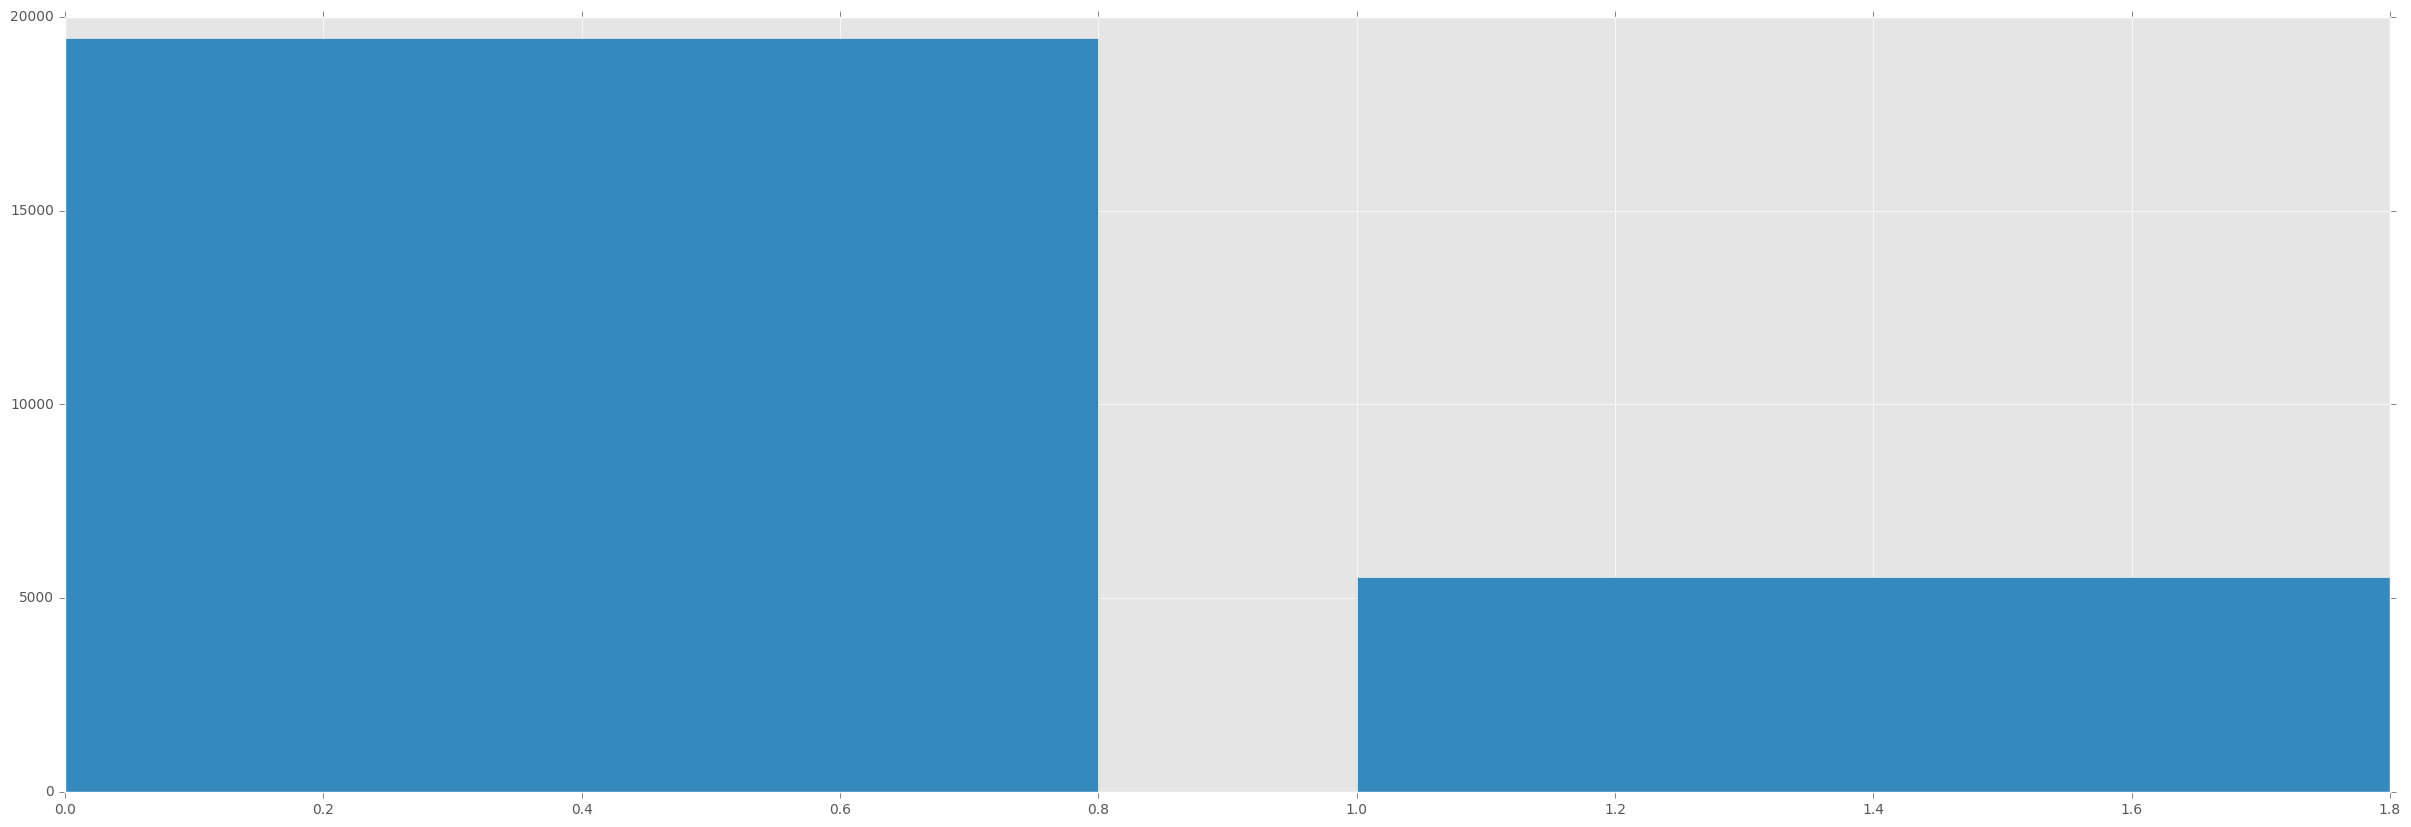

In [11]:
# display data balance for the output variable "Y" in "train_data"
fig = plt.figure(figsize=(30,10))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)

In [12]:
# Observation: In "train_data" set, there are more "0" values than "1". Thus, we might have better performance to 
#              predict "0" than "1".

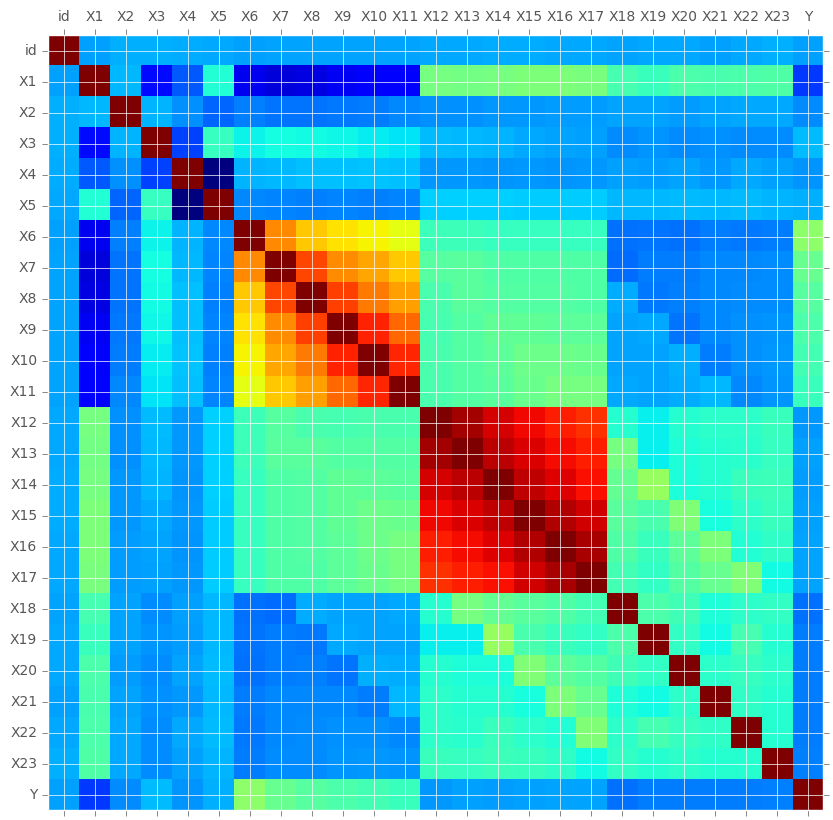

In [13]:
# visualize the feature correlation
corrMatrix = train_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(corrMatrix)
plt.xticks(range(len(corrMatrix.columns)), corrMatrix.columns);
plt.yticks(range(len(corrMatrix.columns)), corrMatrix.columns);

In [14]:
# Observations: The 6th to 11th features are high correlated, so do 12th to 17th. We might want to do 
#               feature engineering to combine some of them.

# Data Modeling

In [15]:
# split data into sub_training_data and validation_data

from sklearn.model_selection import train_test_split

np.random.seed(2016)
Y = train_data['Y']
X = train_data.drop(['Y', 'id'], axis = 1)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [28]:
# 1) build the baseline prediction model - "Random Forest Tree Model"

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier()
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_val)

print metrics.classification_report(y_val, y_pred)

             precision    recall  f1-score   support

          0       0.83      0.94      0.88      3895
          1       0.60      0.33      0.42      1105

avg / total       0.78      0.80      0.78      5000



In [17]:
# optimize the hyperparameters of the baseline - "Random Forest Tree Model"

# define a function call to "GridSearchCV"; to search for the best model parameters

from sklearn import grid_search

def search_model(x_train, y_train, est, param_grid, n_jobs, cv, refit=False):

    model = grid_search.GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring    = 'f1',
                                     verbose    = 10,
                                     n_jobs  = n_jobs,
                                     iid    = True,
                                     refit    = refit,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    print("Scores:", model.grid_scores_)    
    return model

//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
np.random.seed(2016)
param_grid = {'n_estimators':[11, 21, 41, 101],
             'criterion':['gini', 'entropy']}

RF = search_model(x_train.values
            , y_train.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=11, criterion=gini .................................
[CV] n_estimators=11, criterion=gini .................................
[CV] n_estimators=11, criterion=gini .................................
[CV] n_estimators=11, criterion=gini .................................
[CV] n_estimators=11, criterion=gini .................................
[CV] n_estimators=21, criterion=gini .................................
[CV] n_estimators=21, criterion=gini .................................
[CV] n_estimators=21, criterion=gini .................................
[CV] ........ n_estimators=11, criterion=gini, score=0.445517 -   0.8s
[CV] n_estimators=21, criterion=gini .................................
[CV] ........ n_estimators=11, criterion=gini, score=0.481732 -   0.8s
[CV] n_estimators=21, criterion=gini .................................
[CV] ........ n_estimators=11, criterion=gini, score=0.436548 -   0.9s
[CV] ........ n_e

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s


[CV] ........ n_estimators=21, criterion=gini, score=0.464361 -   1.6s
[CV] n_estimators=41, criterion=gini .................................
[CV] ........ n_estimators=21, criterion=gini, score=0.482710 -   1.6s
[CV] n_estimators=41, criterion=gini .................................
[CV] ........ n_estimators=21, criterion=gini, score=0.454142 -   1.6s
[CV] n_estimators=101, criterion=gini ................................
[CV] ........ n_estimators=21, criterion=gini, score=0.481844 -   1.6s
[CV] n_estimators=101, criterion=gini ................................
[CV] ........ n_estimators=21, criterion=gini, score=0.438451 -   1.6s
[CV] n_estimators=101, criterion=gini ................................


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s


[CV] ........ n_estimators=41, criterion=gini, score=0.459885 -   3.1s
[CV] n_estimators=101, criterion=gini ................................
[CV] ........ n_estimators=41, criterion=gini, score=0.468148 -   3.1s
[CV] n_estimators=101, criterion=gini ................................
[CV] ........ n_estimators=41, criterion=gini, score=0.483688 -   3.2s
[CV] n_estimators=11, criterion=entropy ..............................
[CV] ........ n_estimators=41, criterion=gini, score=0.478476 -   3.2s
[CV] ........ n_estimators=41, criterion=gini, score=0.426481 -   3.2s
[CV] n_estimators=11, criterion=entropy ..............................
[CV] n_estimators=11, criterion=entropy ..............................
[CV] ..... n_estimators=11, criterion=entropy, score=0.456385 -   1.1s
[CV] n_estimators=11, criterion=entropy ..............................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s


[CV] ..... n_estimators=11, criterion=entropy, score=0.456867 -   1.1s
[CV] ..... n_estimators=11, criterion=entropy, score=0.478386 -   1.1s
[CV] n_estimators=11, criterion=entropy ..............................
[CV] n_estimators=21, criterion=entropy ..............................
[CV] ..... n_estimators=11, criterion=entropy, score=0.433130 -   1.1s
[CV] n_estimators=21, criterion=entropy ..............................
[CV] ..... n_estimators=11, criterion=entropy, score=0.474044 -   1.2s
[CV] n_estimators=21, criterion=entropy ..............................
[CV] ..... n_estimators=21, criterion=entropy, score=0.459206 -   2.2s
[CV] n_estimators=21, criterion=entropy ..............................
[CV] ..... n_estimators=21, criterion=entropy, score=0.471766 -   2.2s
[CV] n_estimators=21, criterion=entropy ..............................
[CV] ..... n_estimators=21, criterion=entropy, score=0.453548 -   2.2s
[CV] n_estimators=41, criterion=entropy ..............................
[CV] .

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s


[CV] ..... n_estimators=21, criterion=entropy, score=0.466336 -   2.3s
[CV] n_estimators=101, criterion=entropy .............................
[CV] ....... n_estimators=101, criterion=gini, score=0.447059 -   8.3s
[CV] n_estimators=101, criterion=entropy .............................
[CV] ....... n_estimators=101, criterion=gini, score=0.491301 -   8.2s
[CV] n_estimators=101, criterion=entropy .............................


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   12.4s remaining:    4.1s


[CV] ..... n_estimators=41, criterion=entropy, score=0.472543 -   4.5s
[CV] n_estimators=101, criterion=entropy .............................
[CV] ..... n_estimators=41, criterion=entropy, score=0.488921 -   4.4s
[CV] n_estimators=101, criterion=entropy .............................
[CV] ..... n_estimators=41, criterion=entropy, score=0.467802 -   4.4s
[CV] ..... n_estimators=41, criterion=entropy, score=0.476392 -   4.4s
[CV] ..... n_estimators=41, criterion=entropy, score=0.451836 -   4.5s


[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   15.1s remaining:    2.2s


[CV] .... n_estimators=101, criterion=entropy, score=0.471533 -   9.1s
[CV] .... n_estimators=101, criterion=entropy, score=0.482857 -   8.7s
[CV] .... n_estimators=101, criterion=entropy, score=0.454070 -   8.7s
[CV] .... n_estimators=101, criterion=entropy, score=0.442589 -   7.9s
[CV] .... n_estimators=101, criterion=entropy, score=0.490592 -   7.7s
Best score: 0.472
('Best parameters set:', {'n_estimators': 41, 'criterion': 'entropy'})
('Scores:', [mean: 0.45502, std: 0.02109, params: {'n_estimators': 11, 'criterion': 'gini'}, mean: 0.46430, std: 0.01684, params: {'n_estimators': 21, 'criterion': 'gini'}, mean: 0.46334, std: 0.02018, params: {'n_estimators': 41, 'criterion': 'gini'}, mean: 0.47021, std: 0.01524, params: {'n_estimators': 101, 'criterion': 'gini'}, mean: 0.45976, std: 0.01600, params: {'n_estimators': 11, 'criterion': 'entropy'}, mean: 0.45955, std: 0.00885, params: {'n_estimators': 21, 'criterion': 'entropy'}, mean: 0.47150, std: 0.01207, params: {'n_estimators': 41

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.0s finished


In [19]:
# show the prediction performance of the optimized RF model

RF = RandomForestClassifier(n_estimators=41, criterion='entropy')
RF = RF.fit(x_train, y_train)
y_val_pred = RF.predict(x_val)
print metrics.classification_report(y_val, y_val_pred)


             precision    recall  f1-score   support

          0       0.84      0.94      0.89      3895
          1       0.63      0.37      0.47      1105

avg / total       0.79      0.81      0.79      5000



In [20]:
# 2) build another prediction model such as LogisticRegression()

from sklearn import linear_model

param_grid = {'C' : [0.1, 0.01, 1, 10], 'penalty': ['l1','l2'], 'random_state': [2016], 'tol': [0.01]}

svc = search_model(x_train.values
            , y_train.values
            , linear_model.LogisticRegression()
            , param_grid
            , -1
            , 4)


Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] penalty=l1, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l1, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l1, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l1, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l2, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l2, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l2, C=0.1, random_state=2016, tol=0.01 ..................
[CV]  penalty=l1, C=0.1, random_state=2016, tol=0.01, score=0.361055 -   0.1s
[CV]  penalty=l1, C=0.1, random_state=2016, tol=0.01, score=0.374745 -   0.1s
[CV]  penalty=l1, C=0.1, random_state=2016, tol=0.01, score=0.363036 -   0.1s
[CV] penalty=l1, C=0.01, random_state=2016, tol=0.01 .................
[CV] penalty=l2, C=0.1, random_state=2016, tol=0.01 ..................
[CV] penalty=l1, C=0.01, random_state=2016, tol=0.01 ..............

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1218s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s


[CV] penalty=l2, C=1, random_state=2016, tol=0.01 ....................
[CV] penalty=l2, C=1, random_state=2016, tol=0.01 ....................
[CV]  penalty=l2, C=0.01, random_state=2016, tol=0.01, score=0.001795 -   0.1s
[CV]  penalty=l1, C=1, random_state=2016, tol=0.01, score=0.363268 -   0.1s
[CV]  penalty=l2, C=0.01, random_state=2016, tol=0.01, score=0.001799 -   0.1s
[CV] penalty=l1, C=10, random_state=2016, tol=0.01 ...................
[CV] penalty=l1, C=1, random_state=2016, tol=0.01 ....................
[CV] penalty=l1, C=10, random_state=2016, tol=0.01 ...................
[CV]  penalty=l2, C=0.01, random_state=2016, tol=0.01, score=0.000000 -   0.1s
[CV] penalty=l2, C=10, random_state=2016, tol=0.01 ...................
[CV]  penalty=l2, C=0.01, random_state=2016, tol=0.01, score=0.003584 -   0.1s
[CV]  penalty=l1, C=1, random_state=2016, tol=0.01, score=0.350267 -   0.1s
[CV] penalty=l2, C=10, random_state=2016, tol=0.01 ...................
[CV]  penalty=l1, C=10, random_stat

[Parallel(n_jobs=-1)]: Done  13 out of  32 | elapsed:    0.4s remaining:    0.5s


[CV]  penalty=l1, C=1, random_state=2016, tol=0.01, score=0.361955 -   0.1s
[CV]  penalty=l2, C=1, random_state=2016, tol=0.01, score=0.003584 -   0.1s
[CV]  penalty=l2, C=10, random_state=2016, tol=0.01, score=0.001799 -   0.1s
[CV]  penalty=l1, C=10, random_state=2016, tol=0.01, score=0.361955 -   0.1s
[CV]  penalty=l2, C=10, random_state=2016, tol=0.01, score=0.003584 -   0.1s
Best score: 0.366
('Best parameters set:', {'penalty': 'l1', 'C': 0.1, 'random_state': 2016, 'tol': 0.01})
('Scores:', [mean: 0.36583, std: 0.00529, params: {'penalty': 'l1', 'C': 0.1, 'random_state': 2016, 'tol': 0.01}, mean: 0.00179, std: 0.00127, params: {'penalty': 'l2', 'C': 0.1, 'random_state': 2016, 'tol': 0.01}, mean: 0.34089, std: 0.00697, params: {'penalty': 'l1', 'C': 0.01, 'random_state': 2016, 'tol': 0.01}, mean: 0.00179, std: 0.00127, params: {'penalty': 'l2', 'C': 0.01, 'random_state': 2016, 'tol': 0.01}, mean: 0.36277, std: 0.00897, params: {'penalty': 'l1', 'C': 1, 'random_state': 2016, 'tol':

[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished


In [21]:
# show the prediction performance of the optimized LR

LR = linear_model.LogisticRegression(C=0.1, penalty='l1', tol=0.1, random_state=2016)
LR.fit(x_train, y_train)
y_val_pred_LR = LR.predict(x_val)
print metrics.classification_report(y_val, y_val_pred_LR)


             precision    recall  f1-score   support

          0       0.82      0.97      0.89      3895
          1       0.73      0.25      0.37      1105

avg / total       0.80      0.81      0.77      5000



In [22]:
# 3) build another prediction model such as GradientBoostingClassifier()

from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators' : [11, 21, 41, 101], 'learning_rate': [0.1,1], 'random_state': [2016]}

RB = grid_search.GridSearchCV(estimator  = GradientBoostingClassifier(), param_grid = param_grid,
                                     scoring = 'f1', verbose = 10, n_jobs  = 5, iid    = True, refit = False)
RB.fit(x_train, y_train);

print("Best score: %0.3f" % RB.best_score_)
print("Best parameters set:", RB.best_params_)
print("Scores:", RB.grid_scores_)    


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=11, learning_rate=0.1, random_state=2016 ...........
[CV] n_estimators=11, learning_rate=0.1, random_state=2016 ...........
[CV] n_estimators=11, learning_rate=0.1, random_state=2016 ...........
[CV] n_estimators=21, learning_rate=0.1, random_state=2016 ...........
[CV] n_estimators=21, learning_rate=0.1, random_state=2016 ...........
[CV]  n_estimators=11, learning_rate=0.1, random_state=2016, score=0.446336 -   0.3s
[CV] n_estimators=21, learning_rate=0.1, random_state=2016 ...........
[CV]  n_estimators=11, learning_rate=0.1, random_state=2016, score=0.440376 -   0.3s
[CV]  n_estimators=11, learning_rate=0.1, random_state=2016, score=0.418779 -   0.3s
[CV] n_estimators=41, learning_rate=0.1, random_state=2016 ...........
[CV] n_estimators=41, learning_rate=0.1, random_state=2016 ...........


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.4s


[CV]  n_estimators=21, learning_rate=0.1, random_state=2016, score=0.468665 -   0.5s
[CV] n_estimators=41, learning_rate=0.1, random_state=2016 ...........
[CV]  n_estimators=21, learning_rate=0.1, random_state=2016, score=0.449149 -   0.6s
[CV] n_estimators=101, learning_rate=0.1, random_state=2016 ..........
[CV]  n_estimators=21, learning_rate=0.1, random_state=2016, score=0.454867 -   0.6s
[CV] n_estimators=101, learning_rate=0.1, random_state=2016 ..........
[CV]  n_estimators=41, learning_rate=0.1, random_state=2016, score=0.466937 -   1.0s
[CV] n_estimators=101, learning_rate=0.1, random_state=2016 ..........
[CV]  n_estimators=41, learning_rate=0.1, random_state=2016, score=0.477852 -   1.1s
[CV] n_estimators=11, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=41, learning_rate=0.1, random_state=2016, score=0.462939 -   1.0s
[CV] n_estimators=11, learning_rate=1, random_state=2016 .............


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s


[CV]  n_estimators=11, learning_rate=1, random_state=2016, score=0.454267 -   0.3s
[CV] n_estimators=11, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=11, learning_rate=1, random_state=2016, score=0.485161 -   0.3s
[CV] n_estimators=21, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=11, learning_rate=1, random_state=2016, score=0.466446 -   0.3s
[CV] n_estimators=21, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=21, learning_rate=1, random_state=2016, score=0.452166 -   0.6s
[CV] n_estimators=21, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=21, learning_rate=1, random_state=2016, score=0.468547 -   0.6s
[CV] n_estimators=41, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=101, learning_rate=0.1, random_state=2016, score=0.480778 -   2.4s
[CV] n_estimators=41, learning_rate=1, random_state=2016 .............
[CV]  n_estimators=21, learning_rate=1, random_state=2016, score=0.461097

[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    3.1s


[CV]  n_estimators=101, learning_rate=0.1, random_state=2016, score=0.471321 -   2.5s
[CV] n_estimators=101, learning_rate=1, random_state=2016 ............
[CV]  n_estimators=41, learning_rate=1, random_state=2016, score=0.458545 -   1.0s
[CV] n_estimators=101, learning_rate=1, random_state=2016 ............


[Parallel(n_jobs=5)]: Done  18 out of  24 | elapsed:    3.7s remaining:    1.2s


[CV]  n_estimators=101, learning_rate=0.1, random_state=2016, score=0.467410 -   2.6s
[CV] n_estimators=101, learning_rate=1, random_state=2016 ............
[CV]  n_estimators=41, learning_rate=1, random_state=2016, score=0.467960 -   1.0s
[CV]  n_estimators=41, learning_rate=1, random_state=2016, score=0.461102 -   1.0s


[Parallel(n_jobs=5)]: Done  21 out of  24 | elapsed:    4.2s remaining:    0.6s


[CV]  n_estimators=101, learning_rate=1, random_state=2016, score=0.445793 -   2.0s
[CV]  n_estimators=101, learning_rate=1, random_state=2016, score=0.431987 -   1.9s
[CV]  n_estimators=101, learning_rate=1, random_state=2016, score=0.431836 -   1.8s
Best score: 0.473
('Best parameters set:', {'n_estimators': 101, 'learning_rate': 0.1, 'random_state': 2016})
('Scores:', [mean: 0.43516, std: 0.01184, params: {'n_estimators': 11, 'learning_rate': 0.1, 'random_state': 2016}, mean: 0.45756, std: 0.00819, params: {'n_estimators': 21, 'learning_rate': 0.1, 'random_state': 2016}, mean: 0.46924, std: 0.00630, params: {'n_estimators': 41, 'learning_rate': 0.1, 'random_state': 2016}, mean: 0.47317, std: 0.00561, params: {'n_estimators': 101, 'learning_rate': 0.1, 'random_state': 2016}, mean: 0.46862, std: 0.01271, params: {'n_estimators': 11, 'learning_rate': 1, 'random_state': 2016}, mean: 0.46060, std: 0.00670, params: {'n_estimators': 21, 'learning_rate': 1, 'random_state': 2016}, mean: 0.46

[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:    5.8s finished


In [23]:
# show the prediction performance of the optimized GB

GB = GradientBoostingClassifier(n_estimators=101, learning_rate=0.1, random_state=2016).fit(x_train, y_train)
y_val_pred_GB = GB.predict(x_val)
print metrics.classification_report(y_val, y_val_pred_GB)


             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3895
          1       0.66      0.35      0.46      1105

avg / total       0.80      0.82      0.79      5000



In [24]:
# 4) build the Ensemble Model

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier(n_estimators=41, criterion='entropy')
LR = linear_model.LogisticRegression(C=0.1, penalty='l1', tol=0.1, random_state=2016)
GB = GradientBoostingClassifier(n_estimators=101, learning_rate=0.1, random_state=2016)

finalModel = VotingClassifier(estimators=[('Random Forest',RF), ('Logistic Regression', LR), 
                                          ('Gradient Boosting',GB)], voting='hard')

for clf, label in zip([RF, LR, GB, finalModel], ['Random Forest', 'Logistic Regression', 
                                                 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='f1')
    print "Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label)


Accuracy: 0.47 (+/- 0.01) [Random Forest]
Accuracy: 0.35 (+/- 0.02) [Logistic Regression]
Accuracy: 0.47 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.45 (+/- 0.01) [Ensemble]


# Results

In [25]:
# submmit the results

finalModel.fit(X, Y)
y = pd.DataFrame(finalModel.predict(test_data.drop(['id'],axis=1)), columns=['Y'])

predict_data = pd.concat([y, test_data['id']], axis =1)
predict_data.to_csv('./data_HW4/Submmission_new.csv', index=False)